In [1]:
# %load virus_automata.py
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors


<h2>Dados Técnicos</h2>
<ul>
<li><strong>Formato</strong>: Quadrangular</li>
<li><strong>Tamanho</strong>: Von Neumann</li>
<li><strong>Raio</strong>: 1</li>
<li><strong>Condição contorno</strong>: Fixo</li>
<li><strong>Tipo</strong>: Probabilistica</li>
<li><strong>Status Celulas</strong>: Viva Saudável (0), Viva Infectada(1), Morta(2)</li>
</ul>
<h2>Regras</h2>
<p>Cada celula contaminada dentro da vizinha de uma celula saudavel aumenta em 15% de chance de contaminação para aquela celula naquele tempo.<br>
Após 3 tempos a celula infectada morre (Não poderá mais infectar outra celula).
</p>

<h1>Funções</h1>

In [12]:
def pct_contamina(populacao, row, col):
    '''Soma quantas celulas estão contaminadas ao redor da celula saudável
    Retorna % de chance dessa celular ser infectada'''
    top = populacao[row-1, col]
    bot = populacao[row+1, col]
    left = populacao[row, col-1]
    right = populacao[row, col+1]
    total = 0
    '''Os condicionais testam pra que apenas as celulas
    infectadas ainda vivas influenciem na chance de infectar outro'''
    if top <= 1: total += top
    if bot <= 1: total += bot
    if left <= 1: total += left
    if right <= 1: total += right
    return total * 30


def infeccao(porcentagem):
    '''Retorna True se o numero random estiver dentro da % de infecção'''
    if rd.randrange(1,101) <= porcentagem:
        return 1
    return 0


def tempos(data):
    ''' Variavel global pra função conseguir alterar a matriz que esta fora '''
    global population 
    for row in range(1,len(population)-1):
        for col in range(1,len(population[0])-1):
            if population[row, col] == 0:
                '''Aqui é usado as funções para somar os vizinhos infectados
                e decide se a celula saudavel será infectada'''
                chance_contaminar = pct_contamina(population, row, col)
                temp[row, col] = infeccao(chance_contaminar)
            elif population[row, col] == 1:
                ''' Aqui é verificado se a celula irá morrer dependendo de a quantos tempos a cell esta infectada'''            
                if mortos [row, col] >= 6:
                    temp[row, col] = 2
                mortos[row, col] += population[row, col] 


    population = temp
    matriz.set_data(population)
    return [matriz]


<h1>Criando Matriz e Gráficos</h1>

In [7]:
'''Cria uma matrix 100x100 usando a biblioteca numpy'''
population = np.zeros(shape=(101,101),dtype=int)

'''Pacientes Zero'''
population[50, 50] = 1
##population[10, 10] = 1
##population[95, 95] = 1 


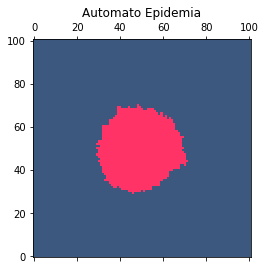

In [51]:
'''Faz uma copia da população e é usada para determinar quando uma celula morre e para cada tempo'''
mortos = population.copy() 
temp = population.copy()

'''Desenhar matriz e escolhendo cores dependendo do valor da celula'''
cores = colors.ListedColormap(['#3c587e','#ff3366','#8B0000'])
limites = [0,1,2,10]
norm = colors.BoundaryNorm(limites, cores.N)
fig, ax = plt.subplots()
ax.set_title("Automato Epidemia")

matriz = ax.matshow(population, cmap=cores, norm=norm, origin='lower', interpolation='nearest')

'''Chama a função tempos que desenha a matriz, transformando tempos em frames'''
ani = animation.FuncAnimation(fig, tempos, frames=400, blit=True, interval=50)
'''Salva a animação em um arquivo MP4 utilizando o codec ffmpeg'''
#ani.save("Infeccao_APOCALIPSE.mp4",  bitrate=-1) #salvar animação como mp4
plt.show()